In [13]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.synthesis import TwoQubitWeylDecomposition

In [14]:
def cartanCircuit(VCxGate):
    circ = QuantumCircuit(2, name="+")
    phi = np.arctan(1 + np.sqrt(3))
    #qubit 0
    circ.x(0)
    circ.ry(phi, 0)
    circ.z(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)

    #qubit 1
    circ.x(1)
    circ.ry(phi, 1)
    circ.z(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.p(15 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)

    circ.append(VCxGate.decompose(), [0, 1])

    circ.barrier(0)
    circ.barrier(1)

    #qubit 0 after VCx

    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.z(0)
    circ.x(0)

    #qubit 1 after VCx

    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.ry(phi, 1)

    return circ

In [15]:
pi = np.pi
sqrt = np.sqrt
log = np.log

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)


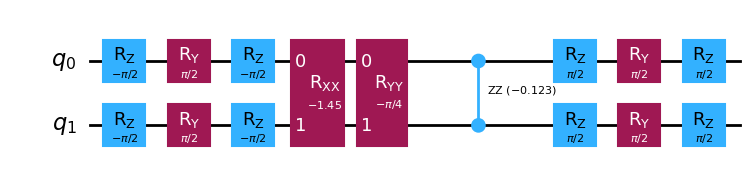

In [16]:
weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()
VCxGate.draw('mpl')

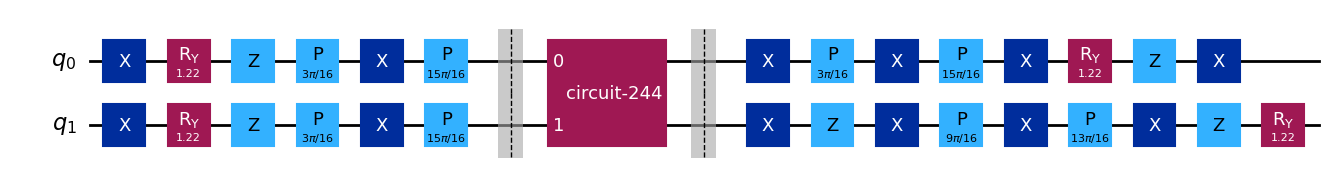

In [17]:
cartanCirc = cartanCircuit(VCxGate)
cartanCirc.draw('mpl')

In [18]:
def CZqutrit():
    circ = QuantumCircuit(4, name="CZ")
    omega = 2*np.pi/3
    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 3)
    circ.cp(-1 * omega, 1, 2)

    return circ

In [19]:
czqutrit = CZqutrit()

In [20]:
ghzcirc = QuantumCircuit(6)

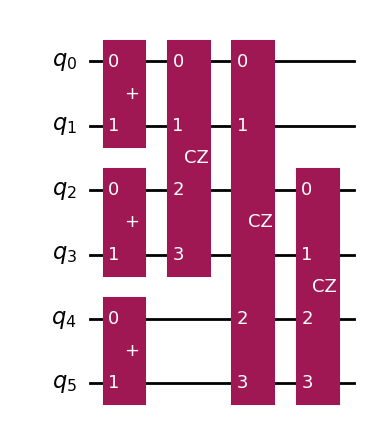

In [21]:
ghzcirc.append(cartanCirc, [0, 1])
ghzcirc.append(cartanCirc, [2, 3])
ghzcirc.append(cartanCirc, [4, 5])
ghzcirc.append(czqutrit, [0, 1, 2, 3])
ghzcirc.append(czqutrit, [0, 1, 4, 5])
ghzcirc.append(czqutrit, [2, 3, 4, 5])

ghzcirc.draw('mpl')

In [26]:
from qiskit.quantum_info import Statevector
ghzState = Statevector(ghzcirc)

In [31]:
ghzState.draw('latex')

<IPython.core.display.Latex object>

In [27]:
ghzOperator = ghzState.to_operator()

In [28]:
ghzMatrix = ghzOperator.to_matrix()

In [29]:
ghzMatrix.round(3)

array([[ 0.037+0.j, -0.037+0.j, -0.037+0.j, ..., -0.   +0.j, -0.   +0.j,
         0.   +0.j],
       [-0.037-0.j,  0.037+0.j,  0.037+0.j, ...,  0.   -0.j,  0.   -0.j,
        -0.   -0.j],
       [-0.037-0.j,  0.037+0.j,  0.037+0.j, ...,  0.   -0.j,  0.   -0.j,
        -0.   -0.j],
       ...,
       [-0.   -0.j,  0.   +0.j,  0.   +0.j, ...,  0.   +0.j,  0.   +0.j,
         0.   -0.j],
       [-0.   -0.j,  0.   +0.j,  0.   +0.j, ...,  0.   +0.j,  0.   +0.j,
         0.   -0.j],
       [ 0.   -0.j, -0.   +0.j, -0.   +0.j, ...,  0.   +0.j,  0.   +0.j,
         0.   +0.j]])